In [1]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import os
import math
from mpl_toolkits import mplot3d

# Entanglement Swapping Simulation

This code performs a classical simulation of a photonic entanglement swapping protocol using Gaussian complex variables to describe photon states. We have a bell state generator for heralding entanglement and for post-selection, and then we conduct quantum state tomography to reconstruct the density matrices of our entangled states. We finally calculate Fidelity and Bell Statistic, and are able to visualize these values over the three main parameters of this model: squeezing strength r, QST detection threshold gamma1, and BSM detection threshold gamma2. Before running this code, be careful about your available storage space. You can need up to 30 GB of space. 

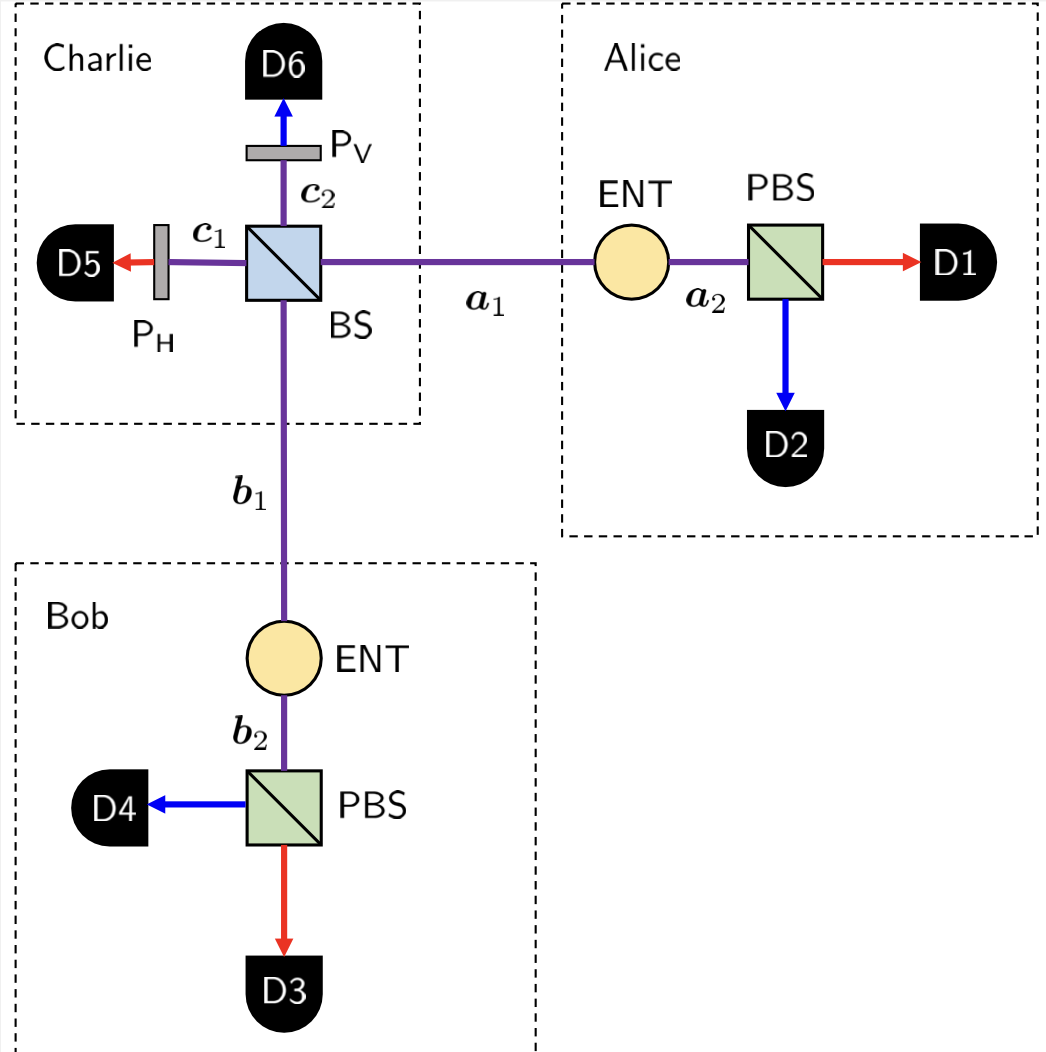

In [2]:
#Enter folder to save Bell states and QST in here

bellstatesfolder = '/Users/aishiguha/Documents/Research/Entanglement_Swapping/BellStates'

In [3]:
#Set number of initializations

N = 10**6

#Defining Identity matrix, Pauli Matrices, Psi- vectors.

I = np.array([[1, 0], [0, 1]]) #Identity I 
X = np.array([[0, 1], [1, 0]]) #X matrix
Y = np.array([[0, -1j], [1j, 0]]) #Y matrix
Z = np.array([[1, 0], [0, -1]]) #Z matrix
braPsi = np.array([0, 1, -1, 0]) #Psi- row vector
ketPsi = np.array([[0], [1], [-1], [0]]) #Psi- column vector

#Defining bases for Bell Statistic measurement

A = Z
A_p = X
B = -(Z + X) / np.sqrt(2)
B_p = (Z - X) / np.sqrt(2)



In [4]:
#Just a function to loop through float values
def float_range(start, end, step):
    current = start
    while current < end:
        yield current
        current += step

# Bell State Generation

In [5]:
#Bell State Generation
#------------------------------------------------------------------
#r = squeezing strength between (0.9:0.1:2.0)
#gamma2 = BSM detector threshold (0.9:0.1:2.3)
#trial = number of different trials in order to calculate 
#N = 10**6

def BellState_Generate(r,gamma2,trial,N,bellstatesfolder_n):
    
    #setting filename and directory
    filename = 'BellState_r-' + str(r) + '_g2-' + str(gamma2) + '_trial-' + str(trial) + '.npz'
    BS_savepath = bellstatesfolder_n
    os.chdir(BS_savepath)
    
    #vacuum fluctuations
    sigma0 = 1/np.sqrt(2)
    sigma = 1/np.sqrt(2)
    
    
    
    #If the file already exists, we can add onto it if we initalize the data with the saved variables
    fileexist = os.path.isfile(BS_savepath + '/' + filename)
    
    if fileexist:
        with open(filename, 'rb') as file:
            data = np.load(file)
            z1Hb = data['z1H_m']
            z1Vb = data['z1V_m']
            z2Hb = data['z2H_m']
            z2Vb = data['z2V_m']
            z3Hb = data['z3H_m']
            z3Vb = data['z3V_m']
            z4Hb = data['z4H_m']
            z4Vb = data['z4V_m']
            z1pb = data['z1p_m']
            z2pb = data['z2p_m']
            z3pb = data['z3p_m']
            z4pb = data['z4p_m']
            z5pb = data['z5p_m']
            z6pb = data['z6p_m']
            z7pb = data['z7p_m']
            z8pb = data['z8p_m']
            #z1H_m, z1V_m, z2H_m, z2V_m, z3H_m, z3V_m, z4H_m, z4V_m, z1p_m, z2p_m, z3p_m, z4p_m, z5p_m, z6p_m, z7p_m, z8p_m, BSM_count = [data[f] for f in data.files]
    #we can initialize empty matrix
    z1H_m = []
    z1V_m = []
    z2H_m = []
    z2V_m = []
    z3H_m = []
    z3V_m = []
    z4H_m = []
    z4V_m = []
    z1p_m = []
    z2p_m = []
    z3p_m = []
    z4p_m = []
    z5p_m = []
    z6p_m = []
    z7p_m = []
    z8p_m = []
    BSM = 0
        
    while BSM <= 10000: #Putting a limit on the number of Bell States generated
        #input random variables for entanglement source -- complex gaussian random variables
        z1H = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z1V = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z2H = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z2V = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z3H = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z3V = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z4H = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z4V = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        
        #PBS Noise 
        z1p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z2p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z3p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z4p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        
        
        #Polarizer Noise, BSM selection
        z5p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z6p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z7p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        z8p = np.random.normal(0, 1 , N) + 1j * np.random.normal(0, 1 , N)
        
        #Psi- state from SPDC 1
        a1H = sigma0*( np.cosh(r)*z1H + np.sinh(r)*np.conj(z2V) )
        a1V = sigma0*( np.cosh(r)*z1V - np.sinh(r)*np.conj(z2H) )
        a2H = sigma0*( np.cosh(r)*z2H - np.sinh(r)*np.conj(z1V) )
        a2V = sigma0*( np.cosh(r)*z2V + np.sinh(r)*np.conj(z1H) )
        
        #Psi- state from SPDC 2
        a3H = sigma*( z3H*np.cosh(r) + np.conj(z4V)*np.sinh(r) )
        a3V = sigma*( z3V*np.cosh(r) - np.conj(z4H)*np.sinh(r) )
        a4H = sigma*( z4H*np.cosh(r) - np.conj(z3V)*np.sinh(r) )
        a4V = sigma*( z4V*np.cosh(r) + np.conj(z3H)*np.sinh(r) )
        
        #Beamsplitter for heralding
        b5H = (1/np.sqrt(2))*(a2H + a4H) 
        b5V = (1/np.sqrt(2))*(a2V + a4V)
        b6H = (1/np.sqrt(2))*(a2H - a4H)
        b6V = (1/np.sqrt(2))*(a2V - a4V)
        
        theta = 0; #polarizer angle selecting on horizontal polarization
        eta = math.pi/2; #polarizer angle selecting on vertical polarization
        
        #polarizer for heralding horizontal polarization
        c5H = b5H*np.cos(theta)**2 + b5V*np.cos(theta)*np.sin(theta) + sigma*z5p*(1-np.cos(theta)**2) - sigma*z6p*np.cos(theta)*np.sin(theta)
        c5V = b5V*np.cos(theta)*np.sin(theta) + b5V*np.sin(theta)**2 - sigma*z5p*np.cos(theta)*np.sin(theta) + sigma*z6p*(1-np.sin(theta)**2)
            
        #polarizer for heralding vertical polarization
        c6H = b6H*np.cos(eta)**2 + b6V*np.cos(eta)*np.sin(eta) + sigma*z7p*(1-np.cos(eta)**2) - sigma*z8p*np.cos(eta)*np.sin(eta)
        c6V = b6V*np.cos(eta)*np.sin(eta) + b6V*np.sin(eta)**2 - sigma*z7p*np.cos(eta)*np.sin(eta) + sigma*z8p*(1-np.sin(eta)**2)
            
        #Detection on 5 and 6
        condition_1 = (np.abs(c5H) > gamma2) | (np.abs(c5V) > gamma2)
        condition_2 = (np.abs(c6H) > gamma2) | (np.abs(c6V) > gamma2)

        D56 = condition_1 & condition_2
        
                
        # Picking out only the elements that gave Bell State Measurement
        z1H_m = np.concatenate((z1H_m, z1H[D56]),axis=0)
        z1V_m = np.concatenate((z1V_m, z1V[D56]),axis=0)
        z2H_m = np.concatenate((z2H_m, z2H[D56]),axis=0)
        z2V_m = np.concatenate((z2V_m, z2V[D56]),axis=0)
        z3H_m = np.concatenate((z3H_m, z3H[D56]),axis=0)
        z3V_m = np.concatenate((z3V_m, z3V[D56]),axis=0)
        z4H_m = np.concatenate((z4H_m, z4H[D56]),axis=0)
        z4V_m = np.concatenate((z4V_m, z4V[D56]),axis=0)
        z1p_m = np.concatenate((z1p_m, z1p[D56]),axis=0)
        z2p_m = np.concatenate((z2p_m, z2p[D56]),axis=0)
        z3p_m = np.concatenate((z3p_m, z3p[D56]),axis=0)
        z4p_m = np.concatenate((z4p_m, z4p[D56]),axis=0)
        z5p_m = np.concatenate((z5p_m, z5p[D56]),axis=0)
        z6p_m = np.concatenate((z6p_m, z6p[D56]),axis=0)
        z7p_m = np.concatenate((z7p_m, z7p[D56]),axis=0)
        z8p_m = np.concatenate((z8p_m, z8p[D56]),axis=0)
        
        BSM = len(z1H_m) #number of Bell states generated
        
        
        if fileexist: #concatenate onto existing variables
            z1H_m = np.concatenate([z1Hb, z1H_m],axis=0)
            z1V_m = np.concatenate([z1Vb, z1V_m],axis=0)
            z2H_m = np.concatenate([z2Hb, z2H_m],axis=0)
            z2V_m = np.concatenate([z2Vb, z2V_m],axis=0)
            z3H_m = np.concatenate([z3Hb, z3H_m],axis=0)
            z3V_m = np.concatenate([z3Vb, z3V_m],axis=0)
            z4H_m = np.concatenate([z4Hb, z4H_m],axis=0)
            z4V_m = np.concatenate([z4Vb, z4V_m],axis=0)
            z1p_m = np.concatenate([z1pb, z1p_m],axis=0)
            z2p_m = np.concatenate([z2pb, z2p_m],axis=0)
            z3p_m = np.concatenate([z3pb, z3p_m],axis=0)
            z4p_m = np.concatenate([z4pb, z4p_m],axis=0)
            z5p_m = np.concatenate([z5pb, z5p_m],axis=0)
            z6p_m = np.concatenate([z6pb, z6p_m],axis=0)
            z7p_m = np.concatenate([z7pb, z7p_m],axis=0)
            z8p_m = np.concatenate([z8pb, z8p_m],axis=0)


            BSM_Count = len(z1H_m) #Number of bell states generated

            np.savez(filename, z1H_m=z1H_m, z1V_m=z1V_m, z2H_m=z2H_m, z2V_m=z2V_m, z3H_m=z3H_m, z3V_m=z3V_m,
                     z4H_m=z4H_m, z4V_m=z4V_m, z1p_m=z1p_m, z2p_m=z2p_m, z3p_m=z3p_m, z4p_m=z4p_m, z5p_m=z5p_m,
                     z6p_m=z6p_m, z7p_m=z7p_m, z8p_m=z8p_m, BSM_Count=BSM_Count)
        else:
            BSM_Count = len(z1H_m)
            np.savez(filename, z1H_m=z1H_m, z1V_m=z1V_m, z2H_m=z2H_m, z2V_m=z2V_m, z3H_m=z3H_m, z3V_m=z3V_m,
                     z4H_m=z4H_m, z4V_m=z4V_m, z1p_m=z1p_m, z2p_m=z2p_m, z3p_m=z3p_m, z4p_m=z4p_m, z5p_m=z5p_m,
                     z6p_m=z6p_m, z7p_m=z7p_m, z8p_m=z8p_m, BSM_Count=BSM_Count)

        

In [ ]:
#Generate Bell states sweeping through squeezing strength r and BSM detection threshold g2
for r in np.arange(0.6,2.1,0.1): #0.6,2.1,0.1
    for g2 in float_range(0.9,2.4,0.1): #0.9,2.3,0.1
        for trl in range(1):
            r_vals = round(r,2)
            g2_vals = round(g2,2)
            BellState_Generate(r_vals,g2_vals,trl,N,bellstatesfolder)

In [6]:
#check BSM counts
BS_savepath = bellstatesfolder
os.chdir(BS_savepath)
for r in np.arange(0.6,2.0,0.1):
    for g2 in float_range(0.9,2.4,0.1):
        for trl in range(1):
            r_vals = round(r,2)
            g2_vals = round(g2,2)
            filename_load = 'BellState_r-' + str(r_vals) + '_g2-' + str(g2_vals) + '_trial-' + str(trl) + '.npz'
            loaded_data = np.load(filename_load)

            BSM_count = loaded_data['BSM_Count']
            print('r = ' + str(r_vals) + ' g2 = ' + str(g2_vals) + ' BSM_Count = ' + str(BSM_count))


r = 0.6 g2 = 0.9 BSM_Count = 1279104
r = 0.6 g2 = 1.0 BSM_Count = 1069603
r = 0.6 g2 = 1.1 BSM_Count = 866764
r = 0.6 g2 = 1.2 BSM_Count = 338260
r = 0.6 g2 = 1.3 BSM_Count = 255262
r = 0.6 g2 = 1.4 BSM_Count = 186008
r = 0.6 g2 = 1.5 BSM_Count = 131712
r = 0.6 g2 = 1.6 BSM_Count = 91066
r = 0.6 g2 = 1.7 BSM_Count = 60871
r = 0.6 g2 = 1.8 BSM_Count = 39648
r = 0.6 g2 = 1.9 BSM_Count = 25514
r = 0.6 g2 = 2.0 BSM_Count = 15758
r = 0.6 g2 = 2.1 BSM_Count = 19183
r = 0.6 g2 = 2.2 BSM_Count = 11491
r = 0.6 g2 = 2.3 BSM_Count = 10356
r = 0.7 g2 = 0.9 BSM_Count = 681824
r = 0.7 g2 = 1.0 BSM_Count = 584567
r = 0.7 g2 = 1.1 BSM_Count = 486957
r = 0.7 g2 = 1.2 BSM_Count = 393238
r = 0.7 g2 = 1.3 BSM_Count = 309507
r = 0.7 g2 = 1.4 BSM_Count = 237001
r = 0.7 g2 = 1.5 BSM_Count = 176417
r = 0.7 g2 = 1.6 BSM_Count = 127952
r = 0.7 g2 = 1.7 BSM_Count = 90803
r = 0.7 g2 = 1.8 BSM_Count = 63534
r = 0.7 g2 = 1.9 BSM_Count = 43348
r = 0.7 g2 = 2.0 BSM_Count = 29396
r = 0.7 g2 = 2.1 BSM_Count = 19392
r =

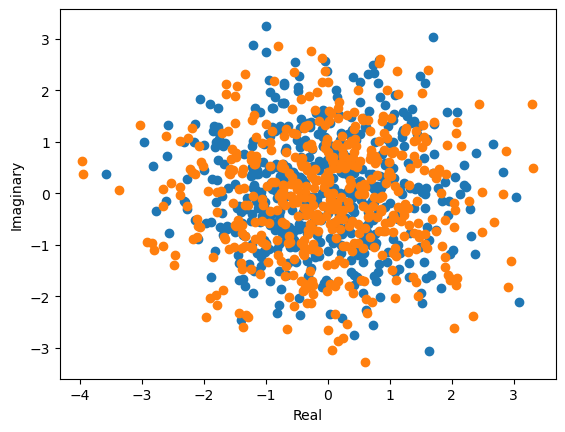

In [7]:
#Visualizing the Bell States generated
r1 = 0.6
gamma2_1 = 2.3
trial1 = 0
filename1 = 'BellState_r-' + str(r1) + '_g2-' + str(gamma2_1) + '_trial-' + str(trial1) + '.npz'
loaded_data = np.load(filename1)
g1_array = np.round(np.arange(0,3.1,0.1),decimals=1) #gamma1 values, (0,0.1,3)


z1h_wa = loaded_data['z1H_m']

#extract real part 
x = [ele.real for ele in z1h_wa] 
#extract imaginary part 
y = [ele.imag for ele in z1h_wa] 


z1v_wa = loaded_data['z1V_m']

#extract real part 
x1 = [ele.real for ele in z1v_wa] 
#extract imaginary part 
y1 = [ele.imag for ele in z1v_wa] 
  
#plot the complex numbers 
plt.scatter(x[0:500], y[0:500]) 
plt.scatter(x1[0:500], y1[0:500]) 
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.show() 




# Quantum State Tomography

In [8]:
#Quantum State Tomography - Density matrix generation, Fidelity and Bell Statistic calculations
#------------------------------------------------------------------
#r = squeezing strength between (0.9:0.1:2.0)
#gamma2 = BSM detector threshold (0.9:0.1:2.3)
#gamma1 = QST detector threshold (0:0.1:3)
#trial = number of different trials in order to calculate 
#N = 10**6
#r, gamma2, trial allow us to find the bell states file


def QST(r,gamma2, gamma1, trial,N,bellstatesfolder_n):
    #setting filename and directory
    Bell_filename = 'BellState_r-' + str(r) + '_g2-' + str(gamma2) + '_trial-' + str(trial) + '.npz'
    BS_savepath = bellstatesfolder_n
    os.chdir(BS_savepath)
    
    #vacuum fluctuations
    sigma0 = 1/np.sqrt(2)
    sigma = 1/np.sqrt(2)
    
    fileexist = os.path.isfile(BS_savepath + '/' + Bell_filename)
    
    if fileexist:
        with open(Bell_filename, 'rb') as file:
            data = np.load(file)
            z1H_m = data['z1H_m']
            z1V_m = data['z1V_m']
            z2H_m = data['z2H_m']
            z2V_m = data['z2V_m']
            z3H_m = data['z3H_m']
            z3V_m = data['z3V_m']
            z4H_m = data['z4H_m']
            z4V_m = data['z4V_m']
            z1p_m = data['z1p_m']
            z2p_m = data['z2p_m']
            z3p_m = data['z3p_m']
            z4p_m = data['z4p_m']
            z5p_m = data['z5p_m']
            z6p_m = data['z6p_m']
            z7p_m = data['z7p_m']
            z8p_m = data['z8p_m']
            BSM_Count = data['BSM_Count']

            
    if BSM_Count < 300000:
        limit = BSM_Count
    else:
        limit = 300000
    
    z1H_m =  z1H_m[1:limit]
    
    z1V_m =  z1V_m[1:limit]
    
    z2H_m =  z2H_m[1:limit]
    
    z2V_m =  z2V_m[1:limit]
    
    z3H_m =  z3H_m[1:limit]
    
    z3V_m =  z3V_m[1:limit]
    
    z4H_m =  z4H_m[1:limit]
    
    z4V_m =  z4V_m[1:limit]
    
    z1p_m =  z1p_m[1:limit]
    
    z2p_m =  z2p_m[1:limit]
    
    z3p_m =  z3p_m[1:limit]
    
    z4p_m =  z4p_m[1:limit]
    
    z5p_m =  z5p_m[1:limit]
    
    z6p_m =  z6p_m[1:limit]
    
    z7p_m =  z7p_m[1:limit]
    
    z8p_m =  z8p_m[1:limit]
    

#     #Creating empty arrays for Fidelity and Bell Statistic
    M = 1 # len(gamma1)
    Fidelity = np.zeros(M)
    BellStat = np.zeros(M)
    rhomatrix = np.zeros((M,4,4))
#     
    
    
    #Psi- from SPDC 1      
    
    a1H = sigma0*( np.cosh(r)*z1H_m + np.sinh(r)*np.conj(z2V_m) ); 
    a1V = sigma0*( np.cosh(r)*z1V_m - np.sinh(r)*np.conj(z2H_m) );
    a2H = sigma0*( np.cosh(r)*z2H_m - np.sinh(r)*np.conj(z1V_m) );
    a2V = sigma0*( np.cosh(r)*z2V_m + np.sinh(r)*np.conj(z1H_m) );

            
    #Psi- from SPDC 2

    a3H = sigma*( np.cosh(r)*z3H_m + np.sinh(r)*np.conj(z4V_m) ); 
    a3V = sigma*( np.cosh(r)*z3V_m - np.sinh(r)*np.conj(z4H_m) );
    a4H = sigma*( np.cosh(r)*z4H_m - np.sinh(r)*np.conj(z3V_m) );
    a4V = sigma*( np.cosh(r)*z4V_m + np.sinh(r)*np.conj(z3H_m) );


    
    # Beamsplitter for heralding
    b5H = (1/np.sqrt(2))*(a2H + a4H)
    b5V = (1/np.sqrt(2))*(a2V + a4V)
    b6H = (1/np.sqrt(2))*(a2H - a4H)
    b6V = (1/np.sqrt(2))*(a2V - a4V)

    theta = 0

    # Polarizers for heralding
    c5H = b5H*np.cos(theta)**2 + b5V*np.cos(theta)*np.sin(theta) + sigma*np.tile(z5p_m, (M, 1))*(1-np.cos(theta)**2) - sigma*np.tile(z6p_m, (M, 1))*np.cos(theta)*np.sin(theta)
    c5V = b5V*np.cos(theta)*np.sin(theta) + b5V*np.sin(theta)**2 - sigma*np.tile(z5p_m, (M, 1))*np.cos(theta)*np.sin(theta) + sigma*np.tile(z6p_m, (M, 1))*(1-np.sin(theta)**2)

    eta = np.pi/2

    c6H = b6H*np.cos(eta)**2 + b6V*np.cos(eta)*np.sin(eta) + sigma*np.tile(z7p_m, (M, 1))*(1-np.cos(eta)**2) - sigma*np.tile(z8p_m, (M, 1))*np.cos(eta)*np.sin(eta)
    c6V = b6V*np.cos(eta)*np.sin(eta) + b6V*np.sin(eta)**2 - sigma*np.tile(z7p_m, (M, 1))*np.cos(eta)*np.sin(eta) + sigma*np.tile(z8p_m, (M, 1))*(1-np.sin(eta)**2)

    # Polarizing beamsplitters and QST
    # Choose PBS basis for right side (detectors 1 & 2)
    # Cycle through PBS's using for loops

    bases = ["H/V", "D/A", "R/L", "H/V_z"]
    for x, basis_x in enumerate(bases, start=1):
        for y, basis_y in enumerate(bases, start=1):
            # Choose PBS basis for left side (detectors 3 & 4)
            if basis_x == "H/V": #I 
                b1H = np.tile(a1H, (M, 1))
                b1V = sigma0*np.tile(z2p_m, (M, 1))
                b2H = sigma0*np.tile(z1p_m, (M, 1))
                b2V = np.tile(a1V, (M, 1))
            elif basis_x == "D/A": #X
                b1H = (a1H + a1V)/2 + sigma0*(np.tile(z1p_m, (M, 1)) - np.tile(z2p_m, (M, 1)))/2
                b1V = (a1H + a1V)/2 - sigma0*(np.tile(z1p_m, (M, 1)) - np.tile(z2p_m, (M, 1)))/2
                b2H = sigma0*(np.tile(z1p_m, (M, 1)) + np.tile(z2p_m, (M, 1)))/2 + (a1H - a1V)/2
                b2V = sigma0*(np.tile(z1p_m, (M, 1)) + np.tile(z2p_m, (M, 1)))/2 - (a1H - a1V)/2
            elif basis_x == "R/L": #Y
                b1H = (a1H - 1j*a1V)/2 + sigma0*(np.tile(z1p_m, (M, 1)) + 1j*np.tile(z2p_m, (M, 1)))/2
                b1V = 1j*(a1H - 1j*a1V)/2 - 1j*sigma0*(np.tile(z1p_m, (M, 1)) + 1j*np.tile(z2p_m, (M, 1)))/2
                b2H = sigma0*(np.tile(z1p_m, (M, 1)) - 1j*np.tile(z2p_m, (M, 1)))/2 + (a1H + 1j*a1V)/2
                b2V = 1j*sigma0*(np.tile(z1p_m, (M, 1)) - 1j*np.tile(z2p_m, (M, 1)))/2 - 1j*(a1H + 1j*a1V)/2
            elif basis_x == "H/V_z": #Z
                b1H = np.tile(a1H, (M, 1))
                b1V = sigma0*np.tile(z2p_m, (M, 1))
                b2H = sigma0*np.tile(z1p_m, (M, 1))
                b2V = np.tile(a1V, (M, 1))

            #  (similarly, choose PBS basis for the left side based on basis_y)
            if basis_y == "H/V": #I 
                b3H = np.tile(a3H, (M, 1))
                b3V = sigma0*np.tile(z4p_m, (M, 1))
                b4H = sigma0*np.tile(z3p_m, (M, 1))
                b4V = np.tile(a1V, (M, 1))
            elif basis_y == "D/A": #X
                b3H = (a3H + a3V)/2 + sigma0*(np.tile(z3p_m, (M, 1)) - np.tile(z4p_m, (M, 1)))/2
                b3V = (a3H + a3V)/2 - sigma0*(np.tile(z3p_m, (M, 1)) - np.tile(z4p_m, (M, 1)))/2
                b4H = sigma0*(np.tile(z1p_m, (M, 1)) + np.tile(z4p_m, (M, 1)))/2 + (a3H - a3V)/2
                b4V = sigma0*(np.tile(z1p_m, (M, 1)) + np.tile(z4p_m, (M, 1)))/2 - (a3H - a3V)/2
            elif basis_y == "R/L": #Y
                b3H = (a3H - 1j*a3V)/2 + sigma0*(np.tile(z3p_m, (M, 1)) + 1j*np.tile(z4p_m, (M, 1)))/2
                b3V = 1j*(a3H - 1j*a3V)/2 - 1j*sigma0*(np.tile(z3p_m, (M, 1)) + 1j*np.tile(z4p_m, (M, 1)))/2
                b4H = sigma0*(np.tile(z3p_m, (M, 1)) - 1j*np.tile(z4p_m, (M, 1)))/2 + (a3H + 1j*a3V)/2
                b4V = 1j*sigma0*(np.tile(z3p_m, (M, 1)) - 1j*np.tile(z4p_m, (M, 1)))/2 - 1j*(a3H + 1j*a3V)/2
            elif basis_y == "H/V_z": #Z
                b3H = np.tile(a3H, (M, 1))
                b3V = sigma0*np.tile(z4p_m, (M, 1))
                b4H = sigma0*np.tile(z3p_m, (M, 1))
                b4V = np.tile(a3V, (M, 1))
                
            # Boolean detection outcomes
            
            D1 = (np.abs(b1H) > gamma1) | (np.abs(b1V) > gamma1)
            D2 = (np.abs(b2H) > gamma1) | (np.abs(b2V) > gamma1)
            D3 = (np.abs(b3H) > gamma1) | (np.abs(b3V) > gamma1)
            D4 = (np.abs(b4H) > gamma1) | (np.abs(b4V) > gamma1)

            
            C1356 = np.sum(D1 & D3 & ~D2 & ~D4)
            C2356 = np.sum(D2 & D3 & ~D1 & ~D4)
            C1456 = np.sum(D1 & D4 & ~D2 & ~D3)
            C2456 = np.sum(D2 & D4 & ~D1 & ~D3)
            

            Sampled = C1356 + C2356 + C1456 + C2456

            #Expectation values for Fidelity and Bell Statistics Calculations

            if basis_x == "H/V" and basis_y == "H/V":
                E11 = (C1356 + C2456 + C1456 + C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V" and basis_y == "D/A":
                E12 = (C1356 - C2456 - C1456 + C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V" and basis_y == "R/L":
                E13 = (C1356 - C2456 - C1456 + C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V" and basis_y == "H/V_z":
                E14 = (C1356 - C2456 - C1456 + C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "D/A" and basis_y == "H/V":
                E21 = (C1356 - C2456 + C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "D/A" and basis_y == "D/A":
                E22 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "D/A" and basis_y == "R/L":
                E23 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "D/A" and basis_y == "H/V_z":
                E24 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "R/L" and basis_y == "H/V":
                E31 = (C1356 - C2456 + C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "R/L" and basis_y == "D/A":
                E32 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "R/L" and basis_y == "R/L":
                E33 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "R/L" and basis_y == "H/V_z":
                E34 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V_z" and basis_y == "H/V":
                E41 = (C1356 - C2456 + C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V_z" and basis_y == "D/A":
                E42 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V_z" and basis_y == "R/L":
                E43 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            elif basis_x == "H/V_z" and basis_y == "H/V_z":
                E44 = (C1356 + C2456 - C1456 - C2356)/(C1356 + C2456 + C1456 + C2356)
            
    for i in range(0,M):
        densityrho = 0.25 * (
            np.kron(I, I) * E11 +
            np.kron(I, X) * E12 +
            np.kron(I, Y) * E13 +
            np.kron(I, Z) * E14 +
            np.kron(X, I) * E21 +
            np.kron(X, X) * E22 +
            np.kron(X, Y) * E23 +
            np.kron(X, Z) * E24 +
            np.kron(Y, I) * E31 +
            np.kron(Y, X) * E32 +
            np.kron(Y, Y) * E33 +
            np.kron(Y, Z) * E34 +
            np.kron(Z, I) * E41 +
            np.kron(Z, X) * E42 +
            np.kron(Z, Y) * E43 +
            np.kron(Z, Z) * E44
        )

        Fidelity[i] = np.nan_to_num(0.5 * np.dot(braPsi, np.dot(densityrho, ketPsi))[0])

        kron_AB = np.kron(A, B)
        kron_A_pB = np.kron(A_p, B)
        kron_Ap_Bp = np.kron(A_p, B_p)
        kron_AB_p = np.kron(A, B_p)
        BellStat[i] = np.nan_to_num(np.abs(np.trace(np.dot(densityrho, kron_AB))) + np.trace(np.dot(densityrho, kron_A_pB)) + np.abs(np.trace(np.dot(densityrho, kron_Ap_Bp))) - np.trace(np.dot(densityrho, kron_AB_p)))

        rhomatrix[i] = np.nan_to_num(densityrho)
        
        return Fidelity, BellStat, rhomatrix

In [9]:
#Saving QST, iterates same r and g2 value over gamma1 array
#saves a file that can be called later with Fidelity, Bell Statistic, and rhomatrix arrays

def savingQST(r, g2, gamma1_arr,trl, N, bellstatesfolder):   
    #Change to directory where QST data is saved
    os.chdir(bellstatesfolder)
    Fidelity = np.zeros(len(gamma1_arr))
    BellStat = np.zeros(len(gamma1_arr))
    rhomatrix = np.zeros((len(gamma1_arr),4,4))
    for i in range(0,len(gamma1_arr)):
        QSTfilename = 'Double_r-'+str(r) +'_g2-' +str(g2) + '_g1-'+str(gamma1_arr[-1])+','+str(gamma1_arr[2]-gamma1_arr[1])+','+str(gamma1_arr[1]) + '_trial-' + str(trl) +'.npz';
        Fidelity[i], BellStat[i], rhomatrix[i] = QST(r_vals,g2_vals,gamma1_arr[i], trl,N,bellstatesfolder)    
    np.savez(QSTfilename, Fidelity = Fidelity, BellStat = BellStat, rhomatrix = rhomatrix)
    

In [ ]:
#Generate Quantum State Tomography data, saves the files

N = 10**6

for r in np.arange(2.0,2.1,0.1): #0.6,2.1,0.1
    for g2 in float_range(0.9,2.4,0.1): #0.9,2.3,0.1
        for trl in range(1):
            r_vals = round(r,2)
            g2_vals = round(g2,2)
            savingQST(r_vals,g2_vals, g1_array, trl, N,bellstatesfolder)

#Ignore the errors that pop up

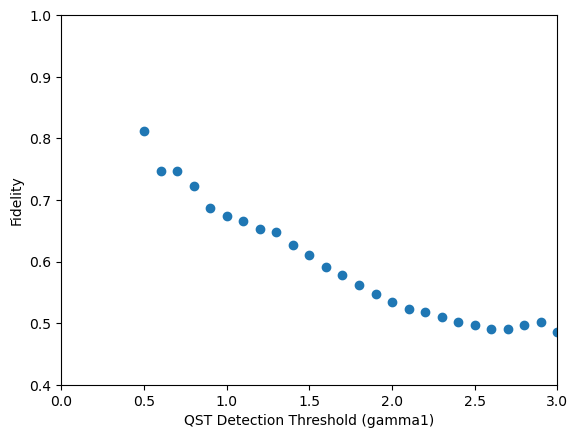

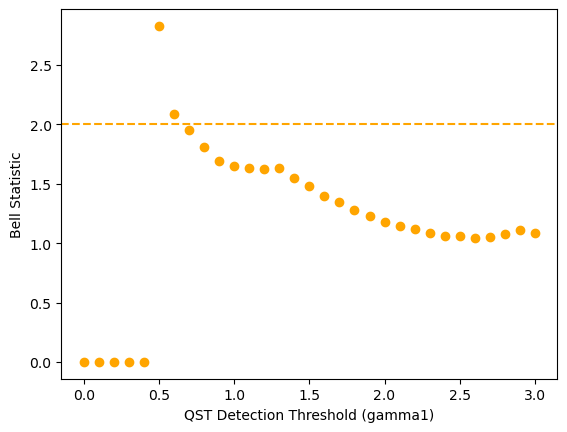

In [18]:
#Display QST data
#Fidelity vs gamma1 array for a given r and g2

given_r = 0.9 #Input any valid r
given_g2 = 2.2 #Input any valid g2

filetoopen = 'Double_r-'+str(given_r) +'_g2-' +str(given_g2) + '_g1-'+str(g1_array[-1])+','+str(g1_array[2]-g1_array[1])+','+str(g1_array[1]) + '_trial-' + str(trl) +'.npz';

QST_data = np.load(filetoopen) 

Fidelity_var = QST_data['Fidelity']
Bell_Statistic_var = QST_data['BellStat']
rhomatrix_var = QST_data['rhomatrix']

#Scatter plot of Fidelity
plt.scatter(g1_array,Fidelity_var)
plt.xlim(0,3)
plt.ylim(0.4,1)
plt.xlabel('QST Detection Threshold (gamma1)')
plt.ylabel('Fidelity')
plt.show()

#Scatter plot of Bell Statistic
plt.scatter(g1_array,Bell_Statistic_var,color='orange')
plt.axhline(y = 2,ls= '--',color='orange')
plt.xlabel('QST Detection Threshold (gamma1)')
plt.ylabel('Bell Statistic')
plt.show()

In [19]:
#Creating Surface plots of Fidelity landscape

# Parameter arrays
r_values = np.round(np.arange(0.6,2.1,0.1),decimals=1)
g2_values = np.round(np.arange(0.9,2.4,0.1),decimals=1)
g1_values = np.round(np.arange(0,3.1,0.1),decimals=1)

# Create a 3D matrix to store fidelity values
fidelity_matrix = np.zeros((len(r_values), len(g2_values), len(g1_values)))

# Dummy function to simulate fidelity calculation
def calculate_fidelity(r, g2, g1,bellstatesfolder,trl):
    openfile = 'Double_r-'+str(r) +'_g2-' +str(g2) + '_g1-'+str(g1_values[-1])+','+str(g1_values[2]-g1_values[1])+','+str(g1_values[1]) + '_trial-' + str(trl) +'.npz';
    os.chdir(bellstatesfolder)
    QST_data = np.load(openfile) 
    Fidelity_var = QST_data['Fidelity']
    index = np.where(g1_values==g1)
    fid = Fidelity_var[index]
    return fid

# Fill in the fidelity_matrix with calculated values
for i, r in enumerate(r_values):
    for j, g2 in enumerate(g2_values):
        for k, g1 in enumerate(g1_values):
            fidelity_matrix[i, j, k] = calculate_fidelity(r, g2, g1,bellstatesfolder,0)

# Display the resulting fidelity_matrix
#print(fidelity_matrix)


#Plotting Fidelity landscape for 2 parameters of choice, keeping one constant
def plot_fidelity(matrix, parameter1_values, parameter2_values, constant_param_val, parameter1_name, parameter2_name, constant_param_name):
    len_parameter1 = len(parameter1_values)
    len_parameter2 = len(parameter2_values)

#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

#     parameter1_indices, parameter2_indices = np.meshgrid(range(len_parameter1), range(len_parameter2), indexing='ij')

#     ax.scatter(parameter1_values[parameter1_indices], parameter2_values[parameter2_indices], matrix[parameter1_indices, parameter2_indices, :], c='b', marker='o')

#     ax.set_xlabel(parameter1_name)
#     ax.set_ylabel(parameter2_name)
#     ax.set_zlabel('Fidelity')
    
    
    parameter1_indices, parameter2_indices = np.meshgrid(range(len_parameter1), range(len_parameter2), indexing='ij')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Use meshgrid to create 2D arrays for parameter1_values and parameter2_values
    parameter1_grid, parameter2_grid = np.meshgrid(parameter1_values, parameter2_values)

    # Plot surface
    if constant_param_name == 'g1': 
        surf = ax.plot_surface(parameter2_grid, parameter1_grid, fidelity_matrix[:, :, np.where(g1_values == constant_param_val)[0][0]], cmap='viridis')
    elif constant_param_name == 'r': 
        surf = ax.plot_surface(parameter2_grid, parameter1_grid, fidelity_matrix[np.where(r_values == constant_param_val)[0][0], :, :], cmap='viridis')
    elif constant_param_name == 'g2': 
        surf = ax.plot_surface(parameter2_grid, parameter1_grid, fidelity_matrix[:, np.where(g2_values == constant_param_val)[0][0], :], cmap='viridis')
    
    ax.set_xlabel(parameter2_name)
    ax.set_ylabel(parameter1_name)
    ax.set_zlabel('Fidelity')
    ax.set_title('Surface Plot')
    #ax.view_init(elev=30, azim=135) #set as needed to rotate the graph

    # Add a colorbar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)


    plt.show()

    



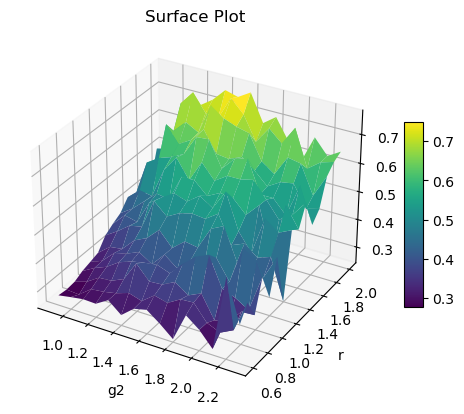

In [26]:
g1_const = 0.6 #Pick value to keep g1 constant
plot_fidelity(fidelity_matrix, r_values, g2_values,g1_const, 'r', 'g2','g1')


In [33]:
#Can input any valid parameter values into fidelity_matrix to get a fidelity
r_input = 0.9
g2_input = 2.3
g1_input = 0.6

print("r = ", r_input)
print("g2 = ", g2_input)
print("g1 = ", g1_input)
print("Fidelity = ", fidelity_matrix[np.where(r_values == r_input),np.where(g2_values == g2_input),np.where(g1_values == g1_input)][0])

r =  0.9
g2 =  2.3
g1 =  0.6
Fidelity =  [0.68297774]
